In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import os,sys
from scipy import stats

In [ ]:
df=pd.read_csv('/content/Copy of SURVEY FORM (Responses) - Form responses 1.csv')

In [ ]:
df.shape


(257, 39)

In [ ]:
df.isna().sum()

Unique ID                                                 0
Class                                                     0
Branch                                                    0
Age                                                       0
12th%  score                                              0
SGPA :1st year                                           59
SGPA: 2nd year                                           63
SGPA : 3rd year                                         122
SGPA:4th year                                           193
 re-exams                                                 0
loc of stay                                               0
Mode of travel                                            0
Duration of travel to college                             0
engaged in part time job?\nIf yes, justify your role      0
degree by choice?                                         0
academic content delivery mode                            0
 mode of examination                    

In [ ]:
df['SGPA:4th year'] = pd.to_numeric(df['SGPA:4th year'], errors='coerce')

# Fill NaN values with the mean of the column
df['SGPA:4th year'].fillna(df['SGPA:4th year'].mean(), inplace=True)

df['SGPA : 3rd year'] = pd.to_numeric(df['SGPA : 3rd year'], errors='coerce')

# Fill NaN values with the mean of the column
df['SGPA : 3rd year'].fillna(df['SGPA : 3rd year'].mean(), inplace=True)

df['SGPA: 2nd year'] = pd.to_numeric(df['SGPA: 2nd year'], errors='coerce')

# Fill NaN values with the mean of the column
df['SGPA: 2nd year'].fillna(df['SGPA: 2nd year'].mean(), inplace=True)

df['SGPA :1st year'] = pd.to_numeric(df['SGPA :1st year'], errors='coerce')

# Fill NaN values with the mean of the column
df['SGPA :1st year'].fillna(df['SGPA :1st year'].mean(), inplace=True)

In [ ]:
sgpa = df.columns[df.columns.str.contains('SGPA')].tolist()
sgpa

['SGPA :1st year', 'SGPA: 2nd year', 'SGPA : 3rd year', 'SGPA:4th year']

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,257.0,20.019455,1.353385,17.0,19.0,20.0,21.0,29.0
SGPA :1st year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGPA: 2nd year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGPA : 3rd year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGPA:4th year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offline assessment methods [Group discussion],257.0,3.739300,1.230366,1.0,3.0,4.0,5.0,5.0
offline assessment methods[Practical Exams],257.0,3.634241,1.198337,1.0,3.0,4.0,5.0,5.0
offline assessment methods [Viva],257.0,3.105058,1.247127,1.0,2.0,3.0,4.0,5.0
offline assessment methods [Projects],257.0,3.871595,1.269785,1.0,3.0,4.0,5.0,5.0
offline assessment methods [Field Visits],257.0,4.070039,1.115829,1.0,4.0,4.0,5.0,5.0


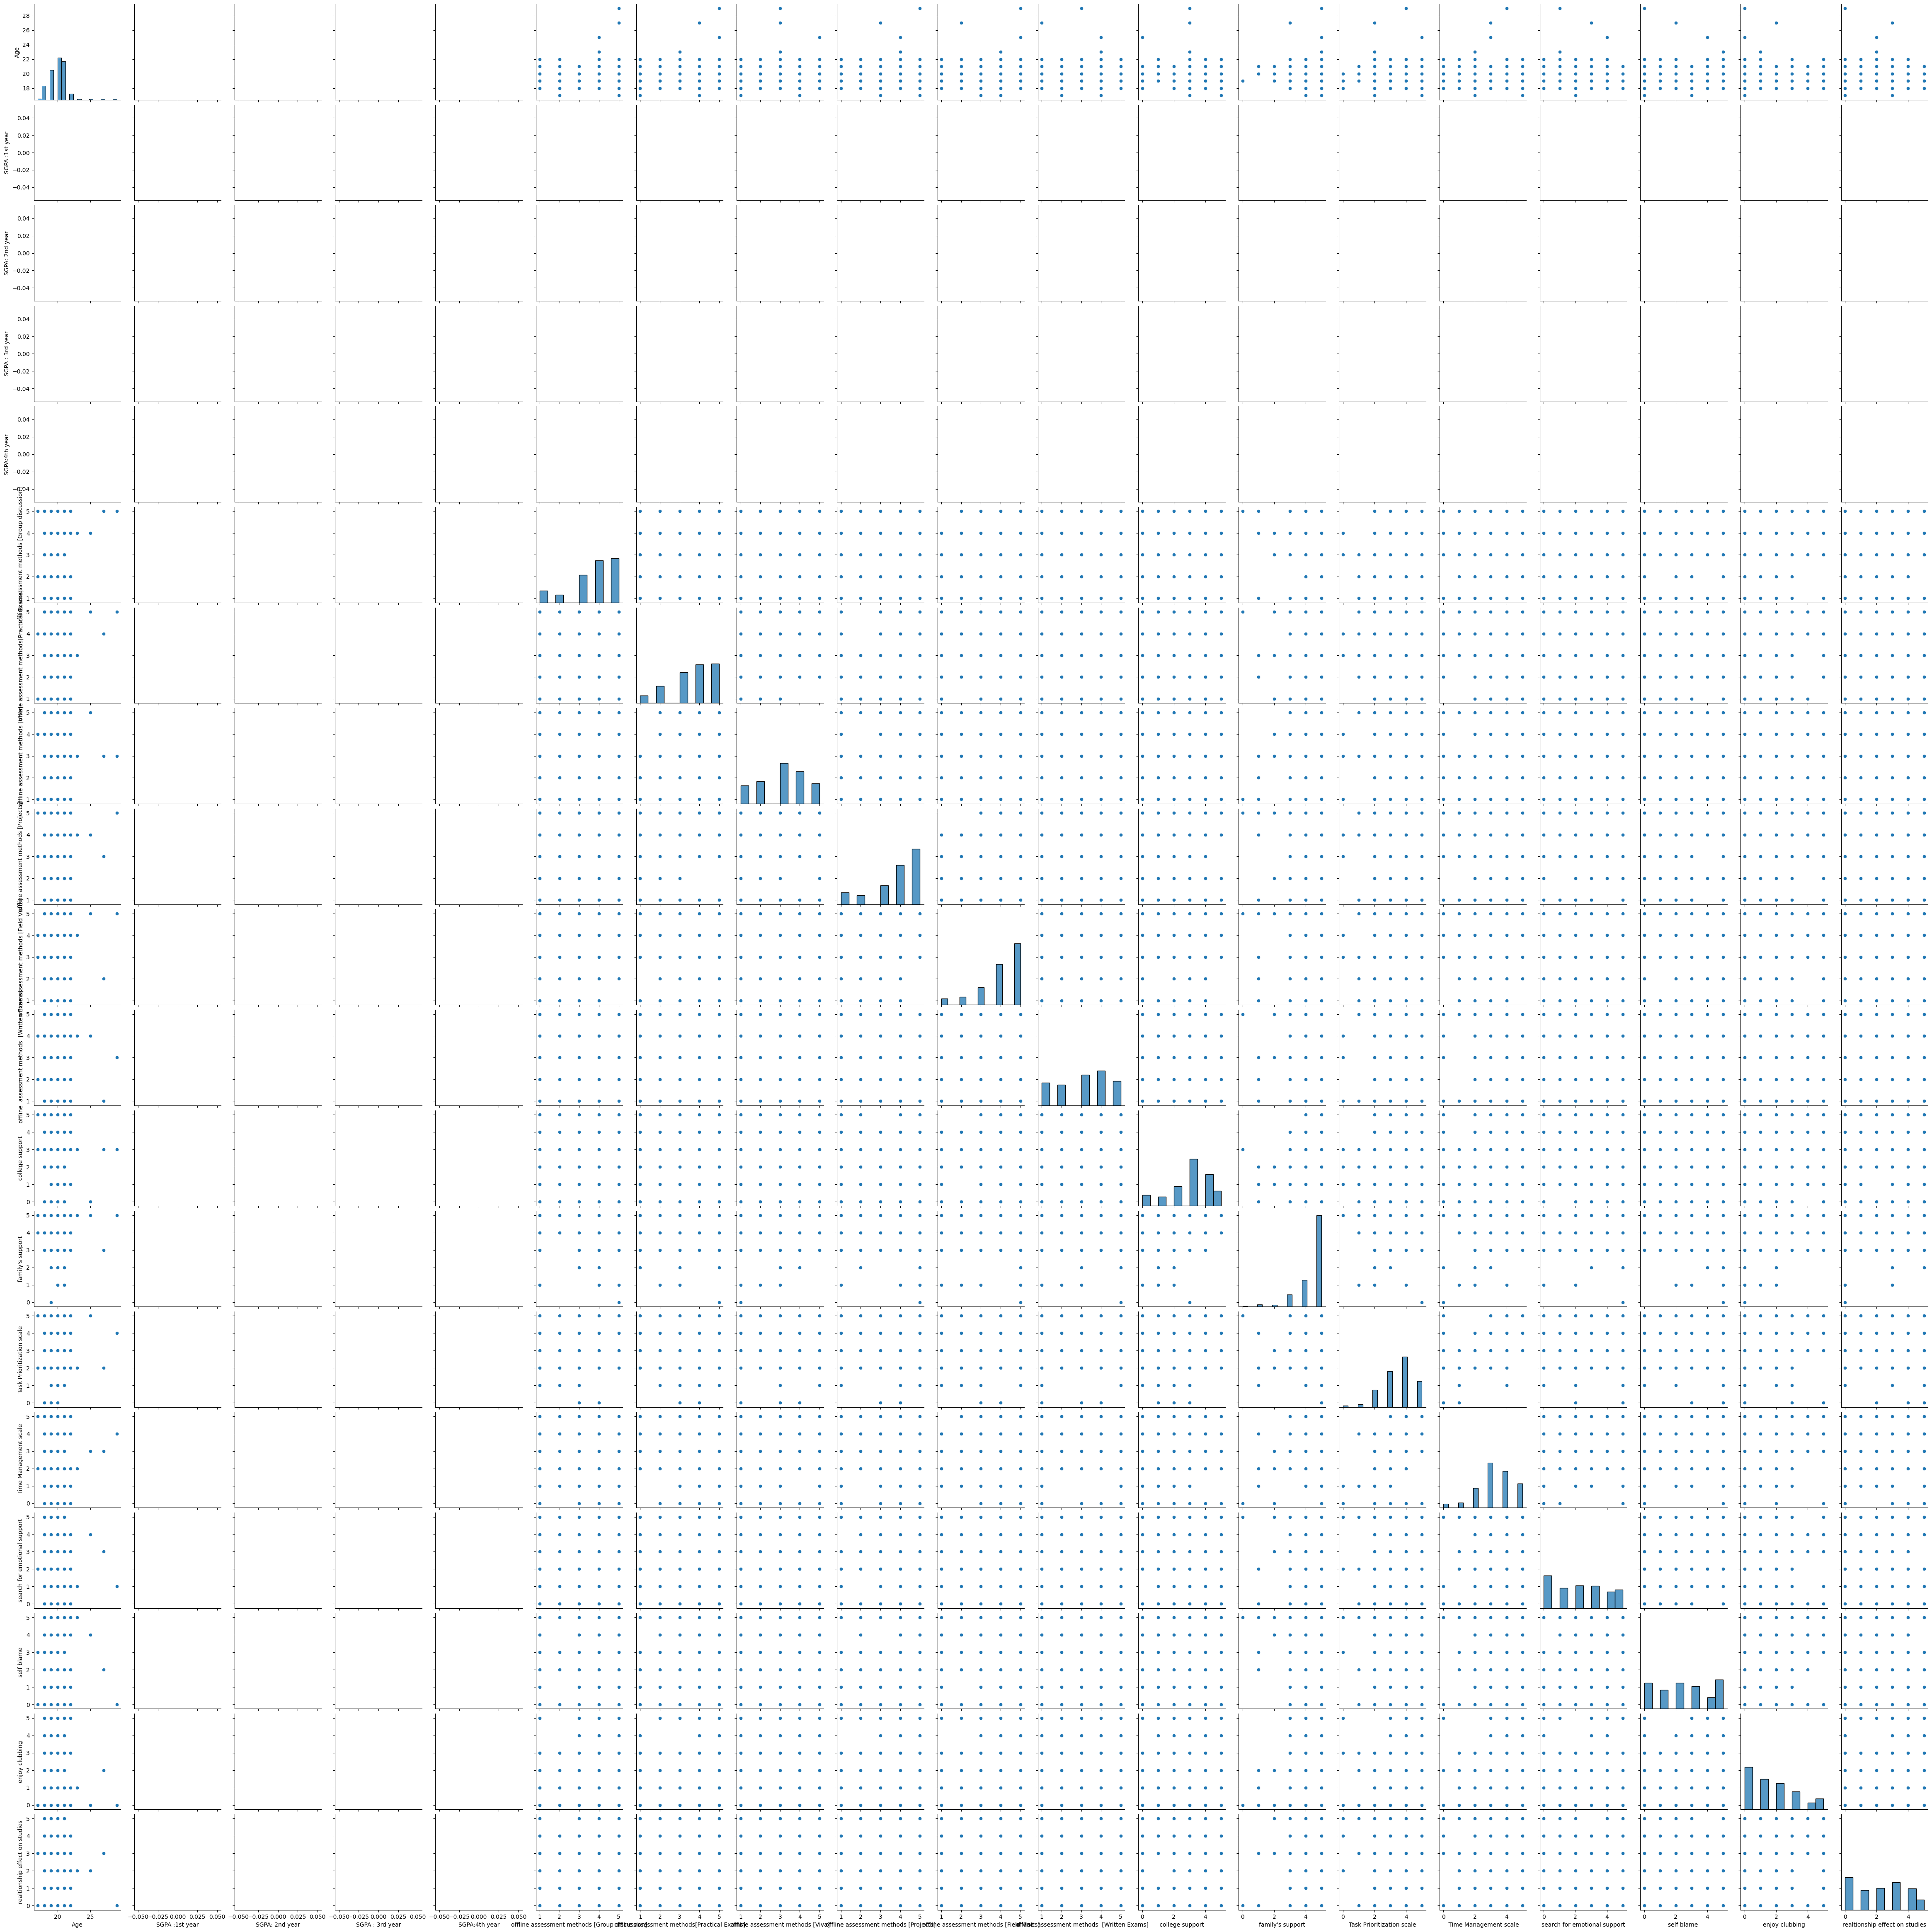

In [ ]:
sns.pairplot(data=df)

In [ ]:
print(df.columns)

Index(['Unique ID', 'Class', 'Branch', 'Age', '12th%  score', 'SGPA :1st year',
       'SGPA: 2nd year', 'SGPA : 3rd year', 'SGPA:4th year', ' re-exams',
       'loc of stay', 'Mode of travel ', 'Duration of travel to college',
       'engaged in part time job?\nIf yes, justify your role',
       'degree by choice? ', 'academic content delivery mode ',
       ' mode of examination', 'offline assessment methods [Group discussion]',
       'offline assessment methods[Practical Exams]',
       'offline assessment methods [Viva]',
       'offline assessment methods [Projects]',
       'offline assessment methods [Field Visits]',
       ' offline  assessment methods  [Written Exams]', 'resources for study ',
       'most effective study techniques', 'mostly used study techniques',
       'number of courses/year', 'organize/participate in technical events',
       'participation in extra curricular activities', 'extra classes',
       'Stress busters activities ', ' college support ', 'famil

In [ ]:
!pip install missingo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement missingo (from versions: none)
ERROR: No matching distribution found for missingo


In [ ]:
import missingno as msno

<Axes: >

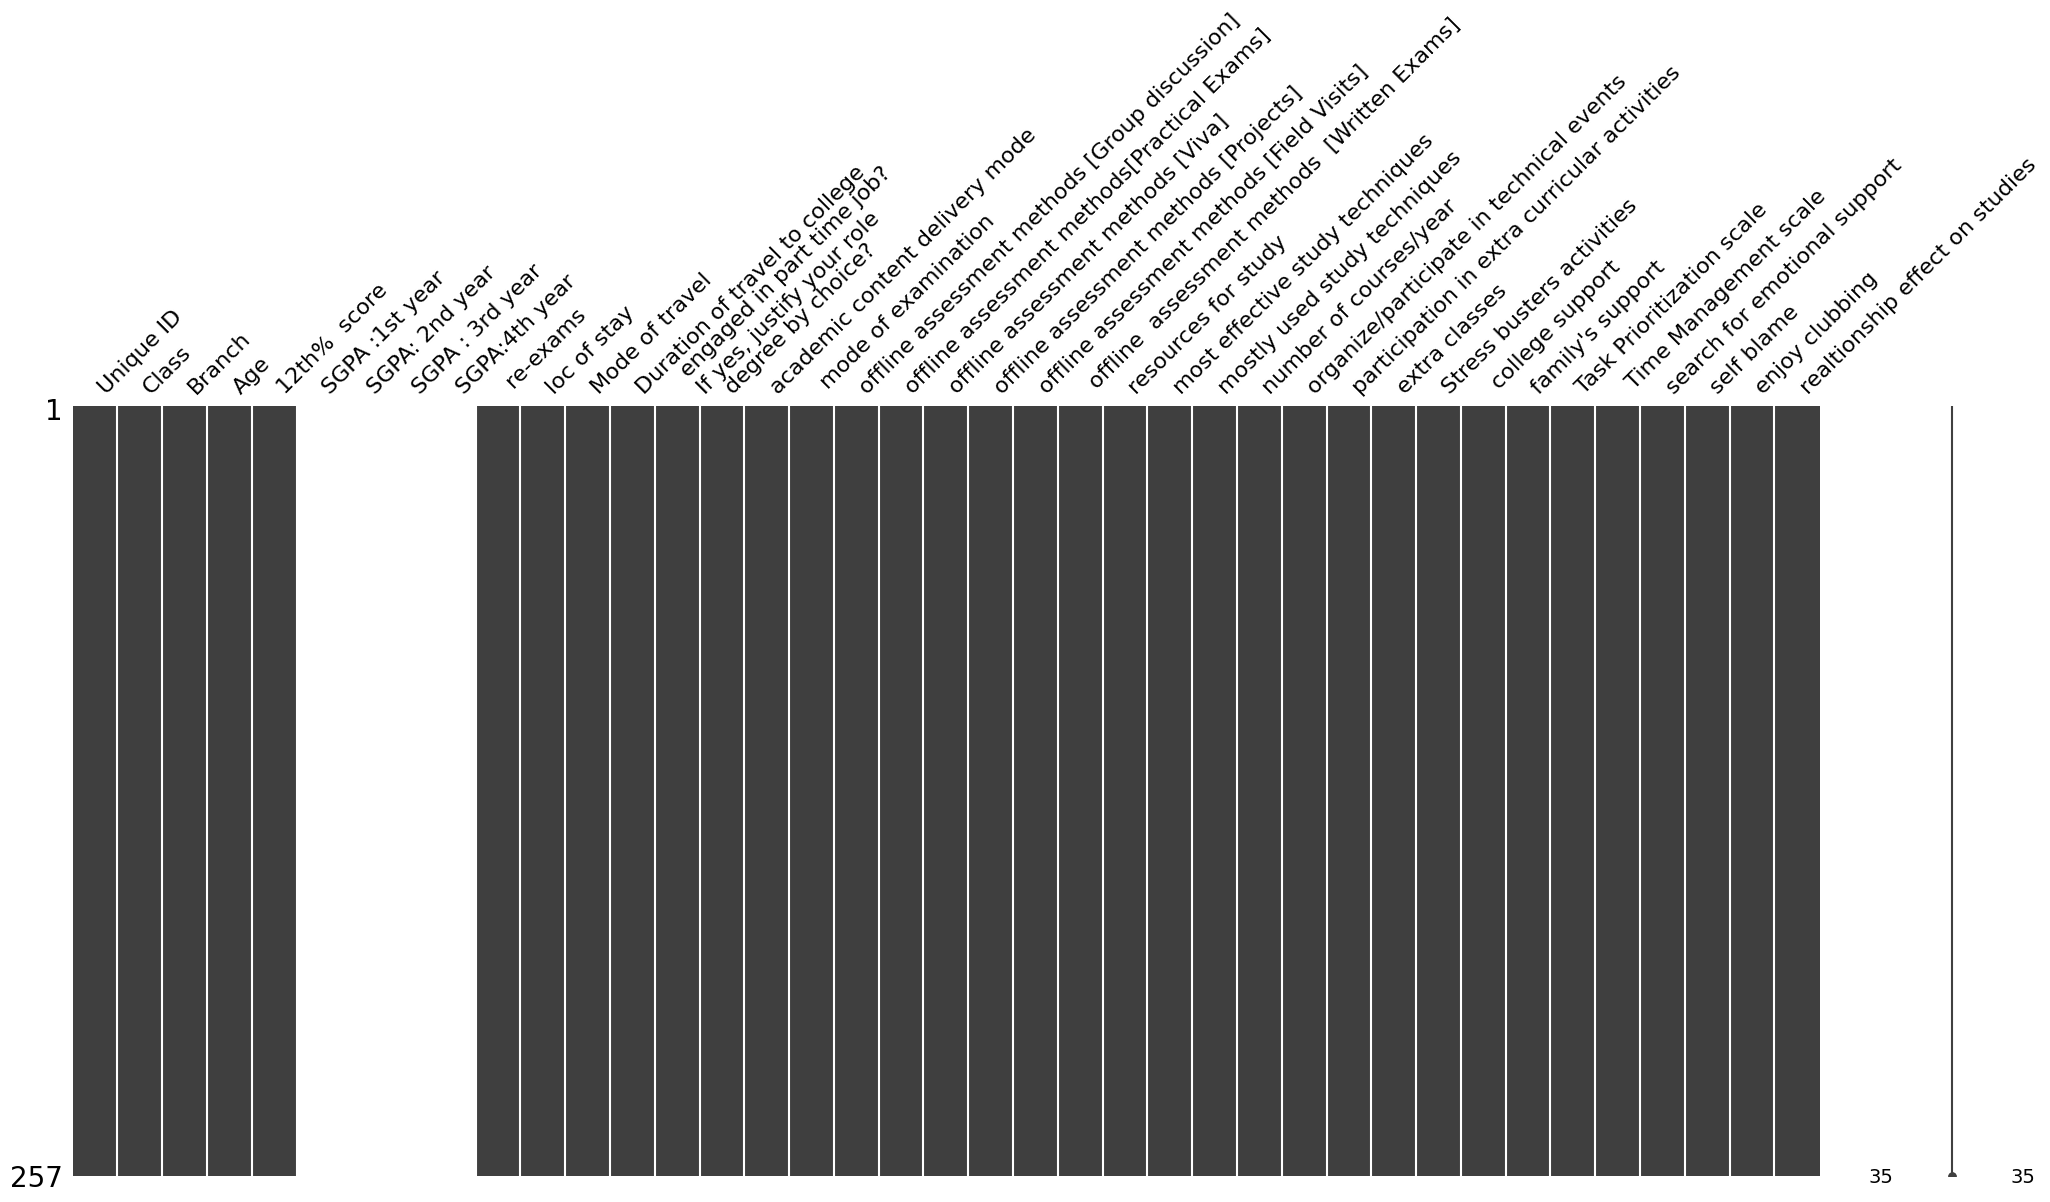

In [ ]:
msno.matrix(df)

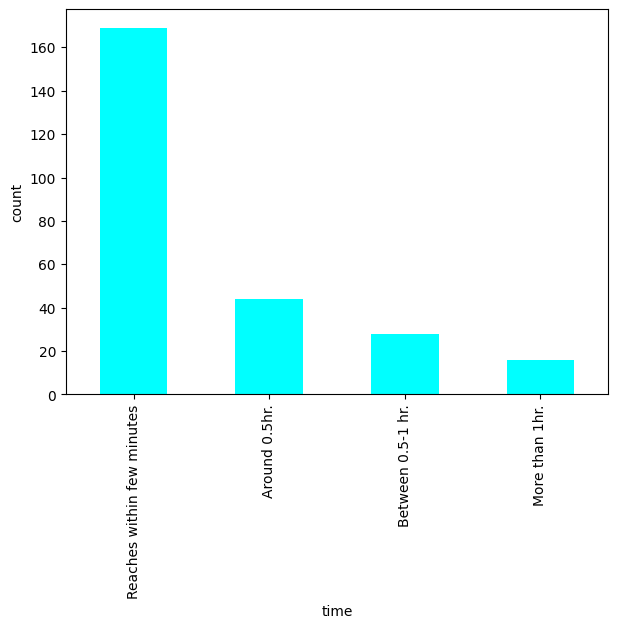

In [ ]:
plt.subplots(figsize=(7,5))

df['Duration of travel to college'].value_counts(normalize=True)
df['Duration of travel to college'].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('')
plt.xlabel('time')
plt.ylabel('count')
plt.show()

In [ ]:
df.select_dtypes(include=[float])

,SGPA :1st year,SGPA: 2nd year,SGPA : 3rd year,SGPA:4th year
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
252,NaN,NaN,NaN,NaN
253,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN
255,NaN,NaN,NaN,NaN


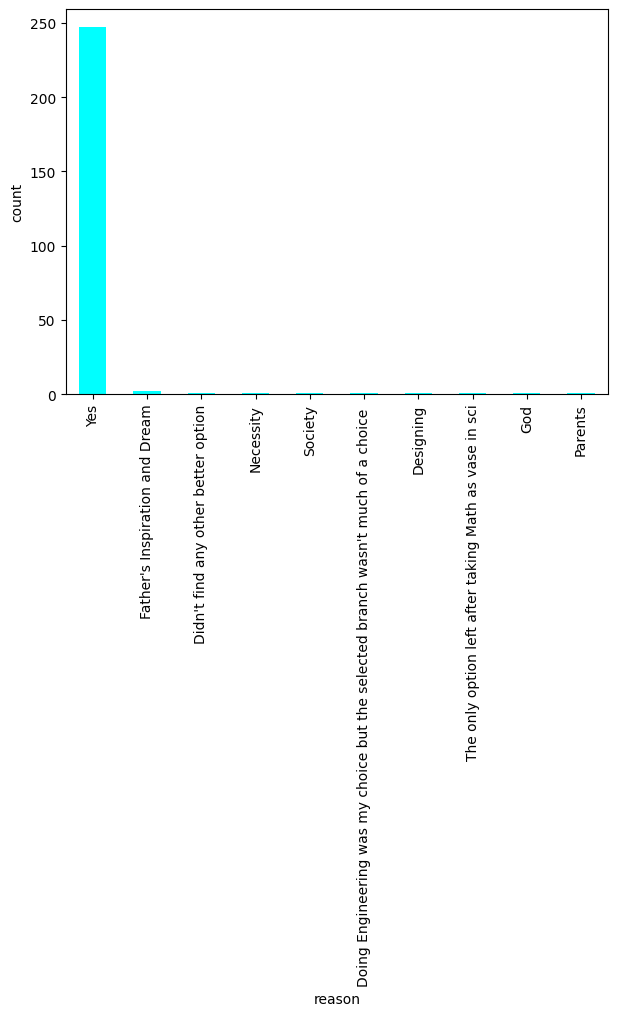

In [ ]:
plt.subplots(figsize=(7,5))

df['degree by choice? '].value_counts(normalize=True)
df['degree by choice? '].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('')
plt.xlabel('reason')
plt.ylabel('count')
plt.show()

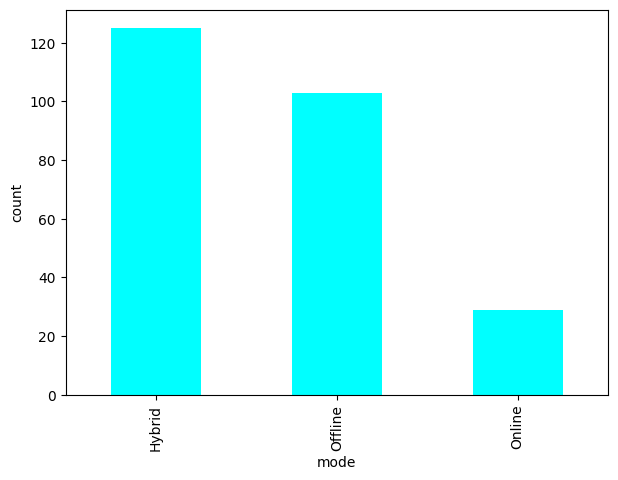

In [ ]:
plt.subplots(figsize=(7,5))

df['academic content delivery mode '].value_counts(normalize=True)
df['academic content delivery mode '].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('')
plt.xlabel('mode')
plt.ylabel('count')
plt.show()

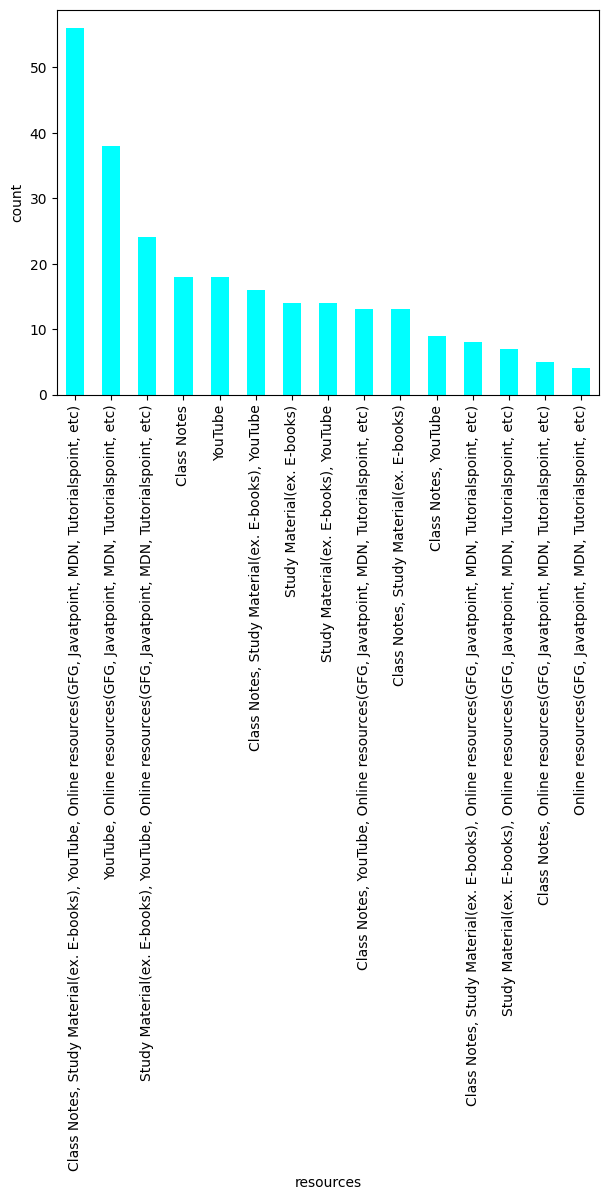

In [ ]:
plt.subplots(figsize=(7,5))

df['resources for study '].value_counts(normalize=True)
df['resources for study '].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('')
plt.xlabel('resources')
plt.ylabel('count')
plt.show()

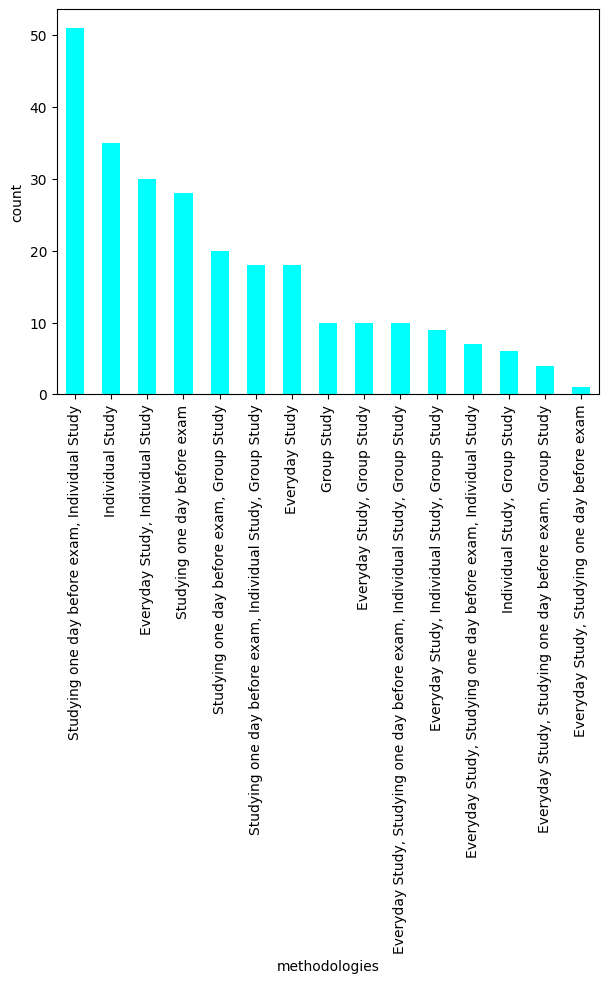

In [ ]:
plt.subplots(figsize=(7,5))

df['most effective study techniques'].value_counts(normalize=True)
df['most effective study techniques'].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('')
plt.xlabel('methodologies')
plt.ylabel('count')
plt.show()

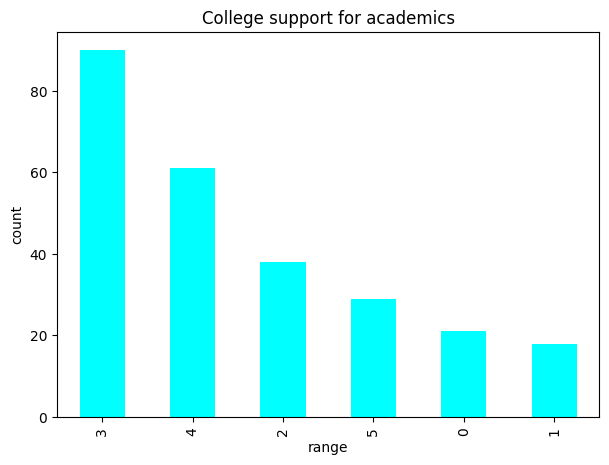

In [ ]:
plt.subplots(figsize=(7,5))

df[' college support '].value_counts(normalize=True)
df[' college support '].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('College support for academics')
plt.xlabel('range')
plt.ylabel('count')
plt.show()

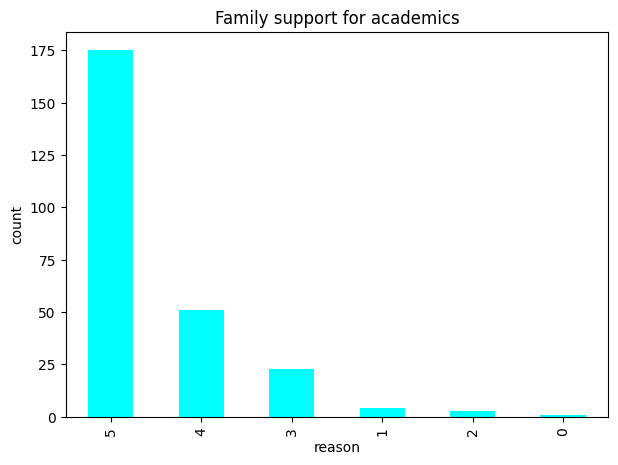

In [ ]:
plt.subplots(figsize=(7,5))

df["family's support"].value_counts(normalize=True)
df["family's support"].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('Family support for academics')
plt.xlabel('reason')
plt.ylabel('count')
plt.show()

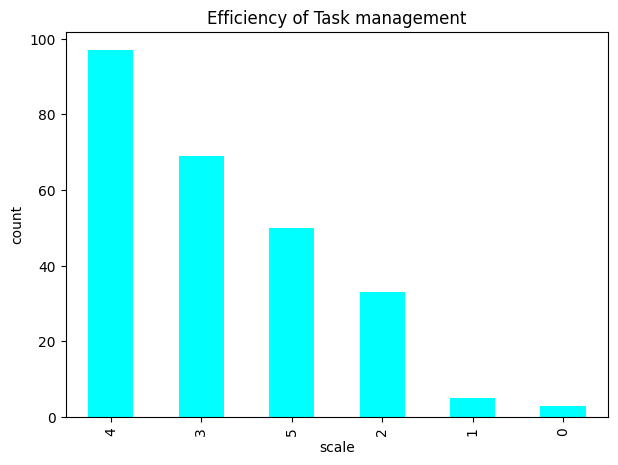

In [ ]:
plt.subplots(figsize=(7,5))

df['Task Prioritization scale'].value_counts(normalize=True)
df['Task Prioritization scale'].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('Efficiency of Task management')
plt.xlabel('scale')
plt.ylabel('count')
plt.show()

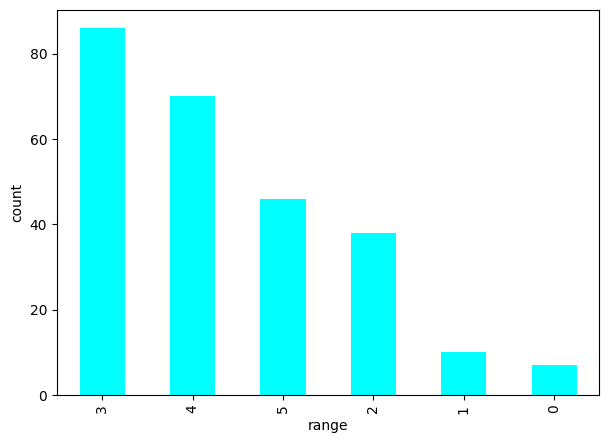

In [ ]:
plt.subplots(figsize=(7,5))

df[' Time Management scale'].value_counts(normalize=True)
df[' Time Management scale'].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('')
plt.xlabel('range')
plt.ylabel('count')
plt.show()

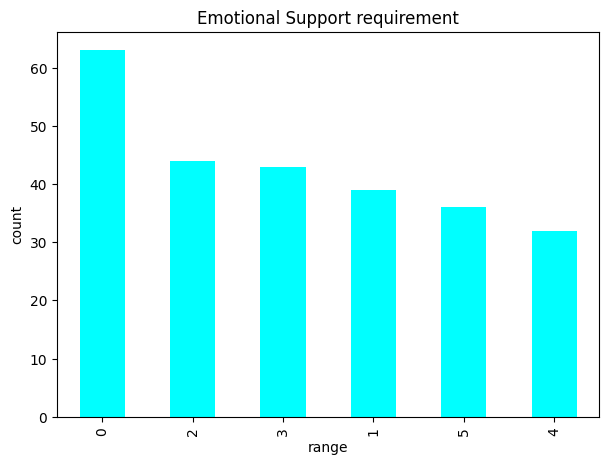

In [ ]:
plt.subplots(figsize=(7,5))

df['search for emotional support'].value_counts(normalize=True)
df['search for emotional support'].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('Emotional Support requirement')
plt.xlabel('range')
plt.ylabel('count')
plt.show()

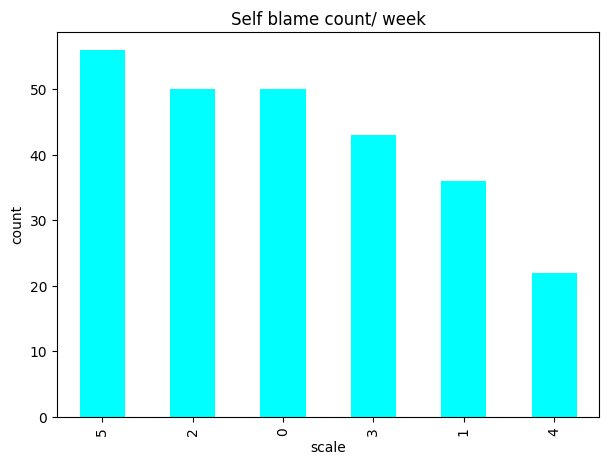

In [ ]:
plt.subplots(figsize=(7,5))

df['self blame '].value_counts(normalize=True)
df['self blame '].value_counts(dropna =True).plot.bar(color='cyan')
plt.title('Self blame count/ week')
plt.xlabel('scale')
plt.ylabel('count')
plt.show()

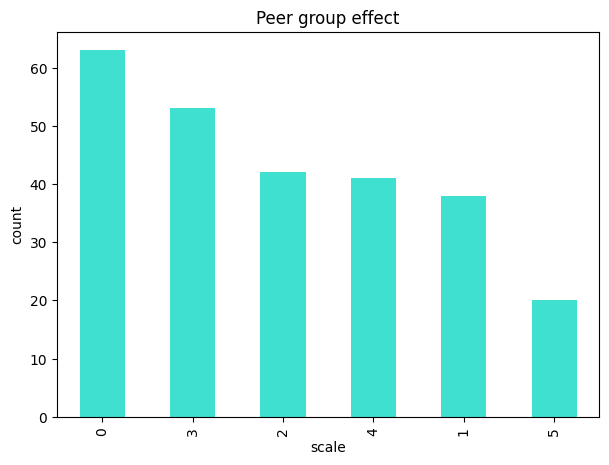

In [ ]:
plt.subplots(figsize=(7,5))

df['realtionship effect on studies'].value_counts(normalize=True)
df['realtionship effect on studies'].value_counts(dropna =True).plot.bar(color='turquoise')
plt.title('Peer group effect')
plt.xlabel('scale')
plt.ylabel('count')
plt.show()



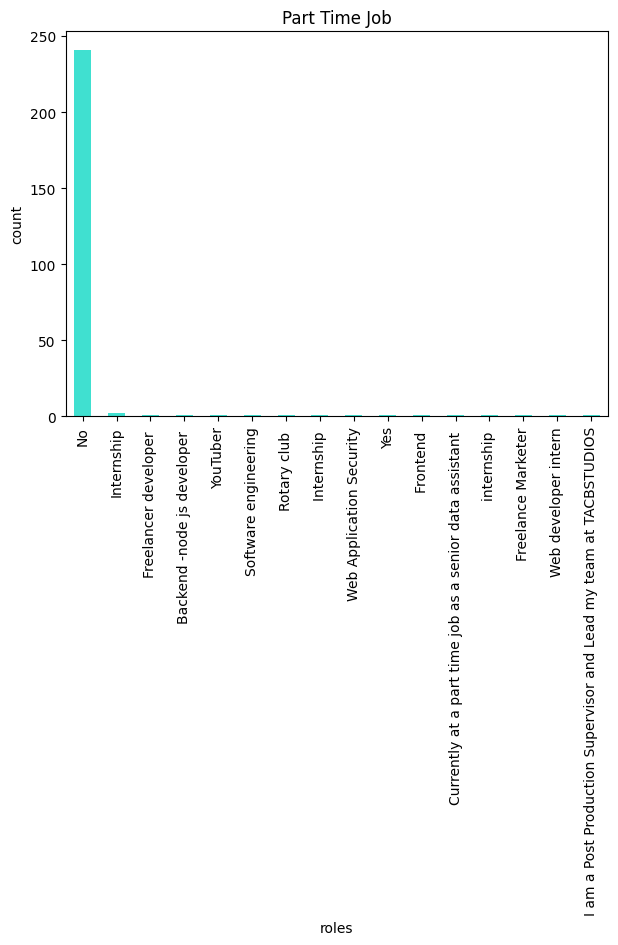

In [ ]:
plt.subplots(figsize=(7,5))

df['engaged in part time job?\nIf yes, justify your role'].value_counts(normalize=True)
df['engaged in part time job?\nIf yes, justify your role'].value_counts(dropna =True).plot.bar(color='turquoise')
plt.title('Part Time Job')
plt.xlabel('roles')
plt.ylabel('count')
plt.show()